# Importing Necessary Libraries

In [62]:
# Importing the essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays
np.random.seed(42)  # Setting a seed for reproducibility

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics and more attractive visualizations
plt.style.use('ggplot')  # Using 'ggplot' style for plots
%matplotlib inline  # Ensures that plots are displayed inline in Jupyter Notebook

# Importing library to suppress warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean

# Importing SMOTE for handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique to handle class imbalance

# Importing libraries for model training and evaluation
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize features by removing the mean and scaling to unit variance

# Importing various machine learning algorithms
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron (Neural Network)
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods: Random Forest and Gradient Boosting

# Importing library for model evaluation
from sklearn.metrics import f1_score  # To calculate the F1 score, a measure of a test's accuracy


UsageError: unrecognized arguments: # Ensures that plots are displayed inline in Jupyter Notebook


# Dataset

In [63]:
# Load the dataset
df = pd.read_csv(r'D:\Data Science\Placement Projects\Seismic Trend analysis\earthquake_data.csv')
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [64]:
# Basic statistics of the data
alerts = df["alert"].unique()


In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

# Data Cleaning

In [66]:
features = ["magnitude", "depth", "cdi", "mmi", "sig", "depth"]
target = "alert"

df = df[features + [target]]

In [67]:
# Check for missing values
df.isna().sum()


magnitude      0
depth          0
cdi            0
mmi            0
sig            0
depth          0
alert        367
dtype: int64

In [68]:
#Dropping the misssing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  415 non-null    float64
 1   depth      415 non-null    float64
 2   cdi        415 non-null    int64  
 3   mmi        415 non-null    int64  
 4   sig        415 non-null    int64  
 5   depth      415 non-null    float64
 6   alert      415 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 25.9+ KB


# Data Preprocessing

In [69]:
# Convert the data types of specific columns to optimize memory usage
df = df.astype({'cdi': 'int8', 'mmi': 'int8', 'sig': 'int8', 'depth': 'int16', 'alert': 'category'})
# Display concise summary of the DataFrame, including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  415 non-null    float64 
 1   depth      415 non-null    int16   
 2   cdi        415 non-null    int8    
 3   mmi        415 non-null    int8    
 4   sig        415 non-null    int8    
 5   depth      415 non-null    int16   
 6   alert      415 non-null    category
dtypes: category(1), float64(1), int16(2), int8(3)
memory usage: 9.9 KB


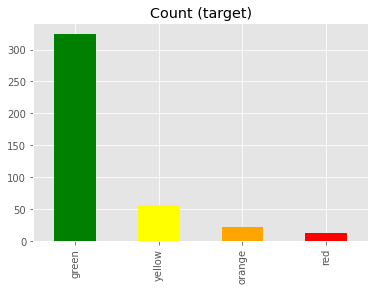

In [70]:
# Plot a bar chart of the value counts for the 'target' column with specified colors and title
df[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

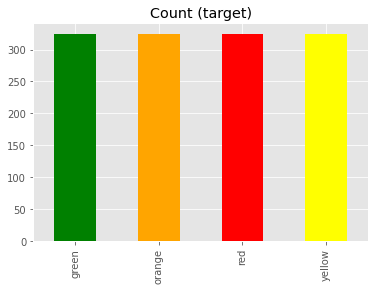

In [71]:
# Separate the features and target variable from the DataFrame
X = df[features]
y = df[target]

# Remove duplicate columns from the features DataFrame
X = X.loc[:,~X.columns.duplicated()]


# Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the target classes
sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

# Plot a bar chart of the value counts for the resampled target variable
y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

# Spliting and Scaling

In [72]:
# Split the resampled dataset into training and testing sets with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [73]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform it
X_test = scaler.transform(X_test)        # Transform the test data using the same scaler


# Exploratory Data Analysis

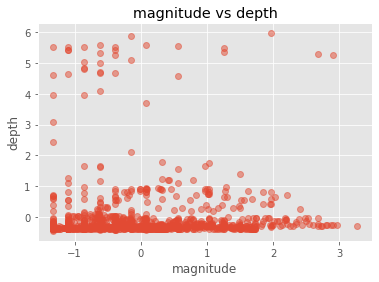

In [74]:
# Plot a scatter plot of the first two standardized features (magnitude vs depth) from the training data
plt.plot(X_train[:, 0], X_train[:, 1], 'o', alpha=0.5)
plt.xlabel('magnitude')
plt.ylabel('depth')
plt.title('magnitude vs depth');
plt.show()

<AxesSubplot:>

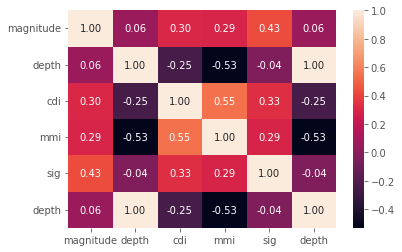

In [75]:
# Plot a heatmap of the correlation matrix of the DataFrame with annotations
sns.heatmap(df.corr(), annot=True, fmt=".2f")


# Machine Learning Models

In [76]:
models = []


# Decision Tree Classifier

In [77]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
models.append(dt)

# Logistic Regression

In [78]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
models.append(lr)

# KNN Classifier

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
models.append(knn)

# Gaussian Naive Bayes Classifier

In [80]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
models.append(gnb)

# MLP Classifier

In [81]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
models.append(nn)

# Support Vector Classifier

In [82]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
models.append(svm)

# Random Forest Classifier

In [83]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models.append(rf)

# Gradient Boosting Classifier

In [84]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models.append(gb)

In [85]:
# Calculate weighted F1 scores for each model in the models list using the test data
f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in models]

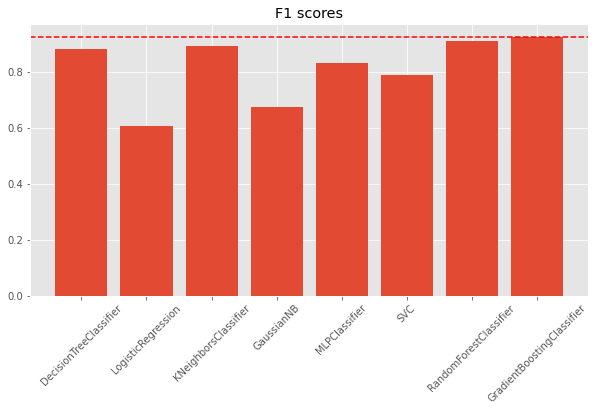

In [86]:
# Plotting a bar chart of F1 scores for different models with a reference line for the maximum score
plt.figure(figsize=(10, 5))
plt.bar([type(model).__name__ for model in models], f1_scores)
plt.xticks(rotation=45)
plt.axhline(max(f1_scores), color='r', linestyle='--')
plt.title('F1 scores')
plt.show()

In [87]:
# Get the maximum F1 score from the list
max(f1_scores)


0.9261234669705195